In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset using pandas
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Load dataset into a DataFrame
df = pd.read_csv(url, names=column_names, na_values='?')

# Handle missing values
# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
df['sex'] = df['sex'].replace({1: 'male', 0: 'female'})
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: could not convert string to float: 'male'

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset using pandas
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Load dataset into a DataFrame
df = pd.read_csv(url, names=column_names, na_values='?')

# Handle missing values
# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
# Convert 'sex' to numeric values: 1 for male, 0 for female
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})

# Get dummy variables for categorical columns
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

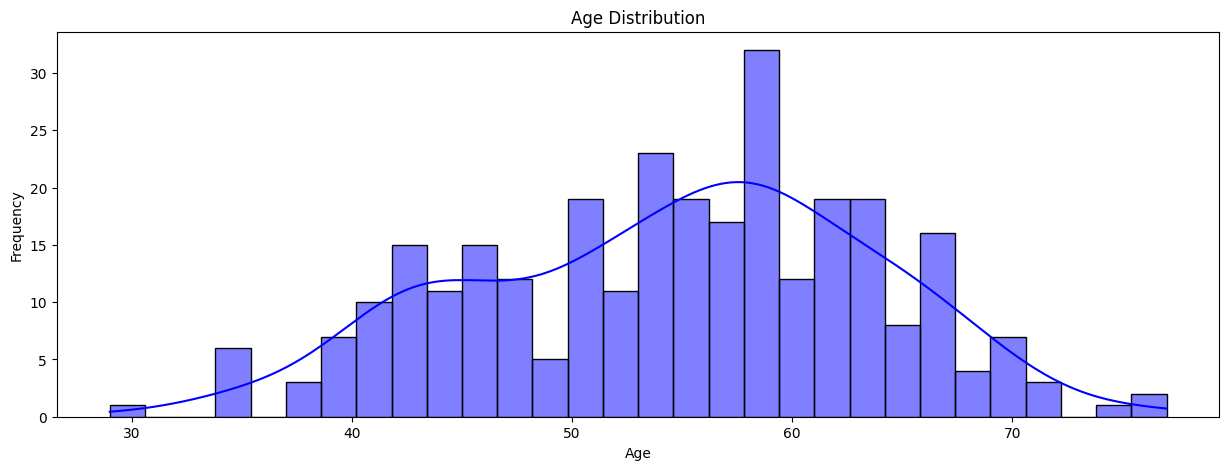

In [21]:
plt.figure(figsize=(15, 5))
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

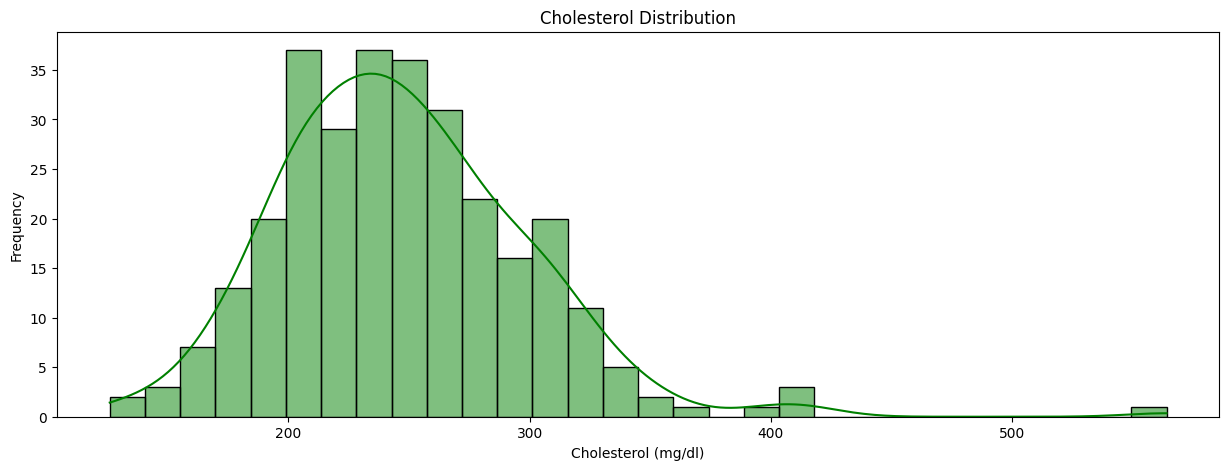

In [22]:

plt.figure(figsize=(15, 5))
sns.histplot(df['chol'], kde=True, bins=30, color='green')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Frequency')
plt.show()


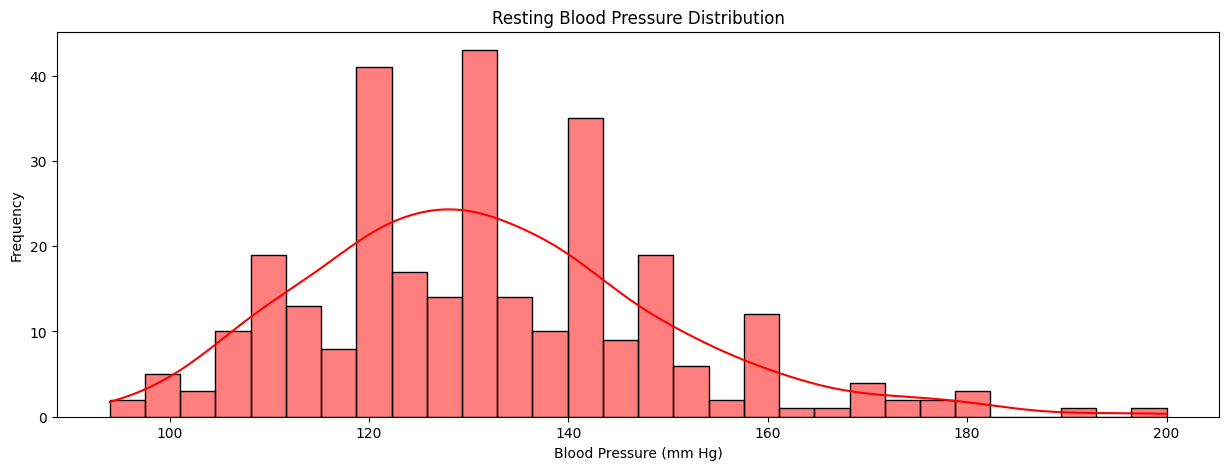

In [23]:

plt.figure(figsize=(15, 5))
sns.histplot(df['trestbps'], kde=True, bins=30, color='red')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()

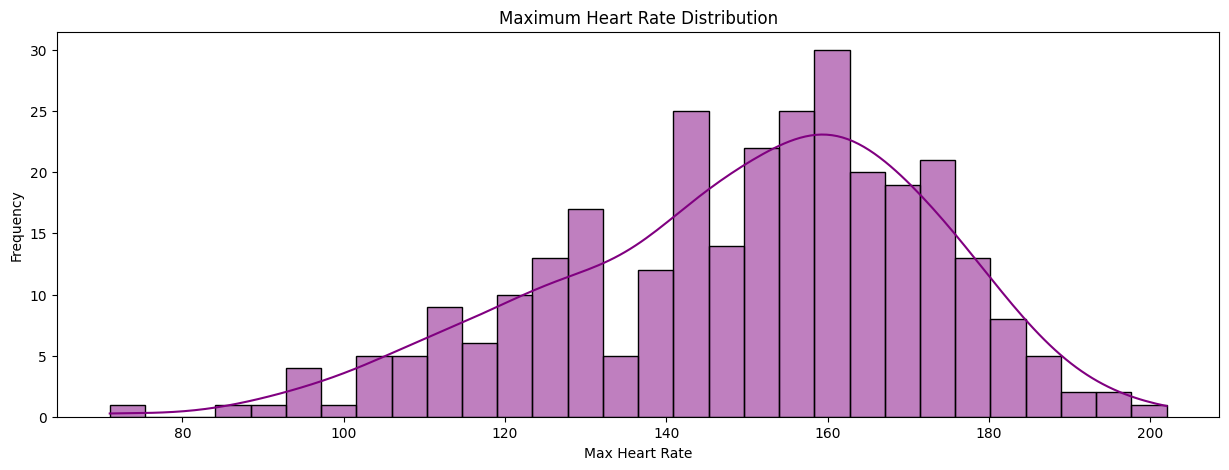

In [24]:

plt.figure(figsize=(15, 5))
sns.histplot(df['thalach'], kde=True, bins=30, color='purple')
plt.title('Maximum Heart Rate Distribution')
plt.xlabel('Max Heart Rate')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Adding derived outcomes as new columns to the dataset

# 1. Risk Assessment for Cardiovascular Diseases
w1, w2, w3, w4, w5 = 0.2, 0.2, 0.2, 0.2, 0.2
# Assuming weights are equal for simplicity
df['risk_score'] = w1 * df['age'] + w2 * df['chol'] + w3 * df['trestbps'] + w4 * df['fbs'] + w5 * df['thalach']

# 2. Likelihood of Hypertension
df['hypertension_likelihood'] = ((df['trestbps'] > 130) | (df['chol'] > 200)) & (df['age'] > 40)

# 3. Metabolic Syndrome Risk
df['metabolic_syndrome_risk'] = (df['chol'] > 200).astype(int) + (df['fbs'] > 120).astype(int) + (df['trestbps'] > 130).astype(int)

# 4. Exercise Tolerance and Cardiovascular Fitness
df['exercise_tolerance_score'] = df['thalach'] - (df['age'] * 0.5) - (df['exang'] * 20)

# 5. Stress or Anxiety Indicator
df['stress_indicator'] = ((df['cp'] == 2) | (df['cp'] == 3)) & (df['restecg'] == 1)

# 6. Predicting Coronary Artery Disease (CAD) Severity
df['cad_severity_score'] = 3 * df['thal'] + 2 * df['oldpeak'] + df['exang'] + df['restecg']

# 7. Heart Function and Electrical Stability
df['heart_instability_indicator'] = (df['restecg'] == 1).astype(int)

# 8. Prediction of Diabetes or Pre-Diabetic State
df['diabetes_risk'] = (df['fbs'] > 120).astype(int)

# 9. Atherosclerosis Likelihood
df['atherosclerosis_score'] = ((df['age'] > 45).astype(int) + (df['chol'] > 240).astype(int) + (df['trestbps'] > 140).astype(int))

# 10. Exercise-Induced Ischemia
df['ischemia_indicator'] = ((df['oldpeak'] > 1.0) & (df['exang'] == 1)).astype(int)

# 11. General Cardiovascular Health Indicator
w1, w2, w3, w4 = 0.25, 0.25, 0.25, 0.25  # Assuming equal weights for simplicity
df['health_score'] = 100 - (w1 * df['age'] + w2 * df['trestbps'] + w3 * df['chol'] + w4 * df['fbs'])

KeyError: 'cp'

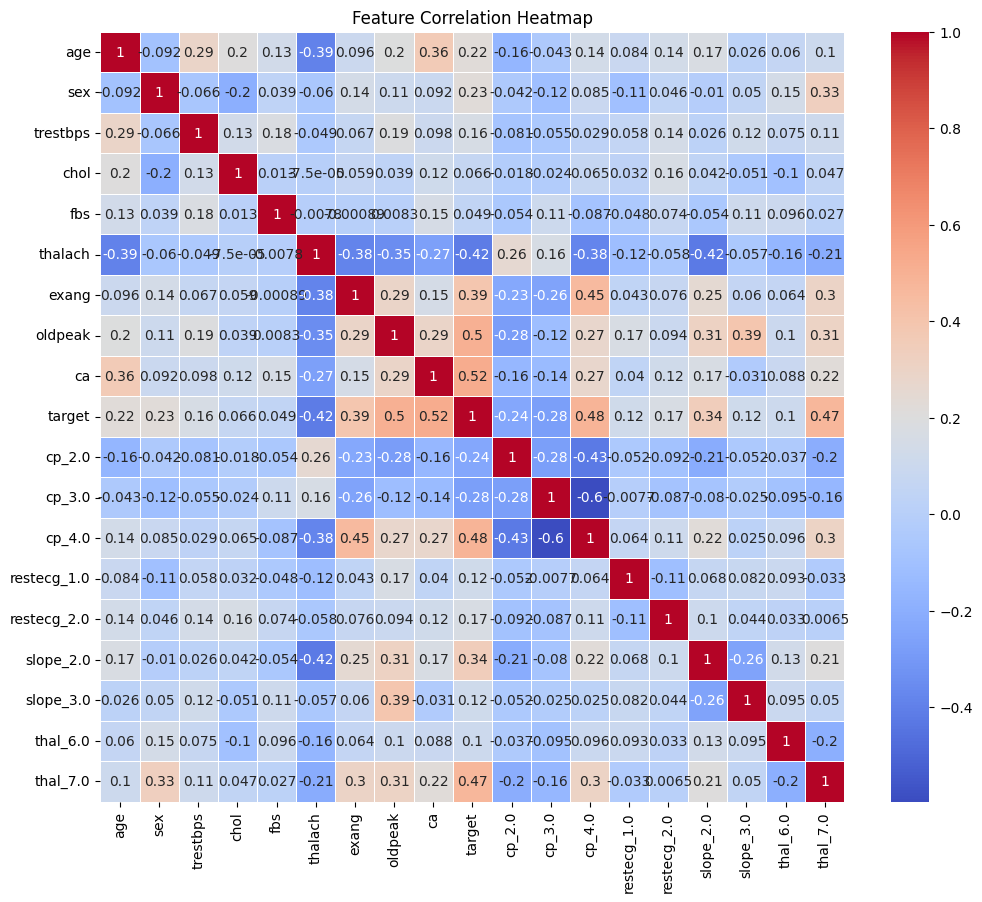

In [25]:
# Explore correlations between features

plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

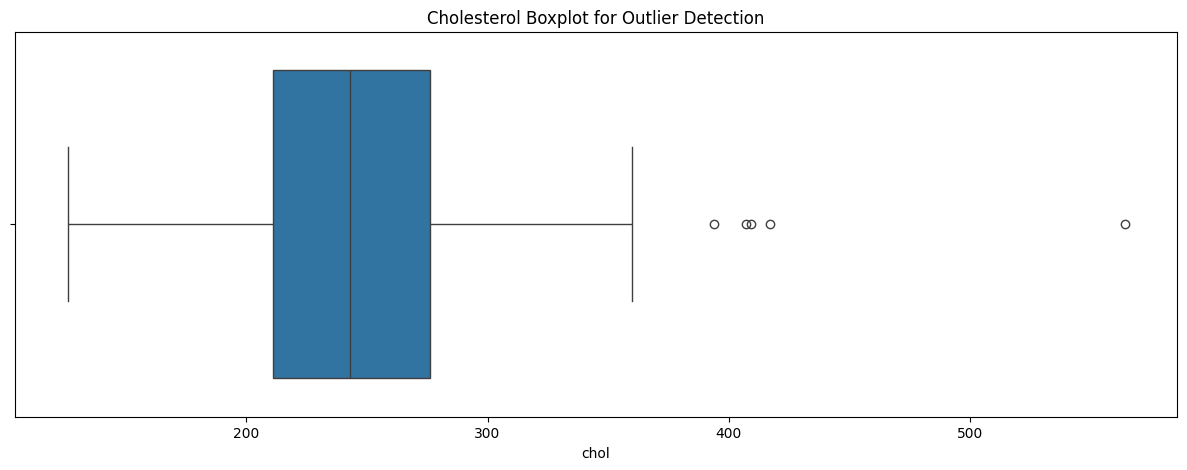

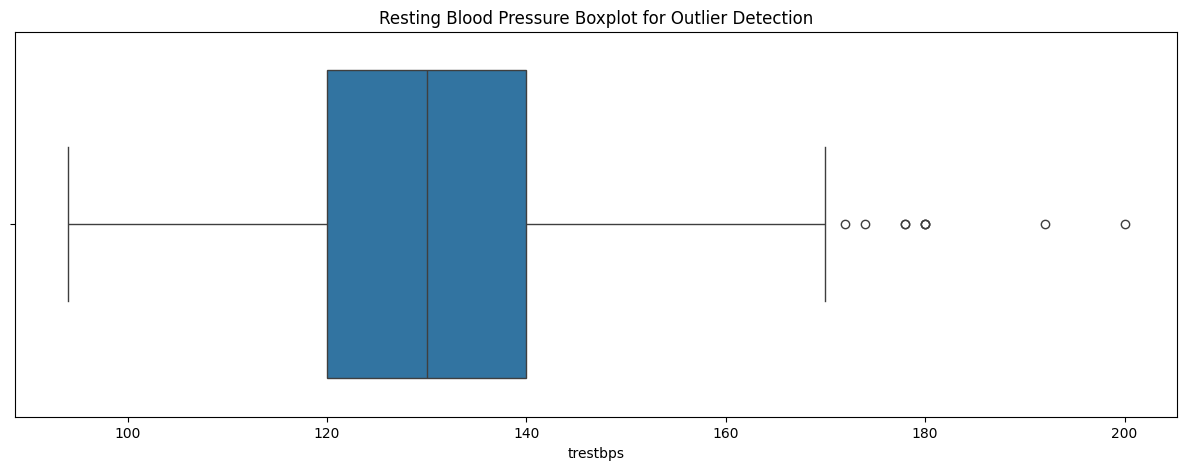

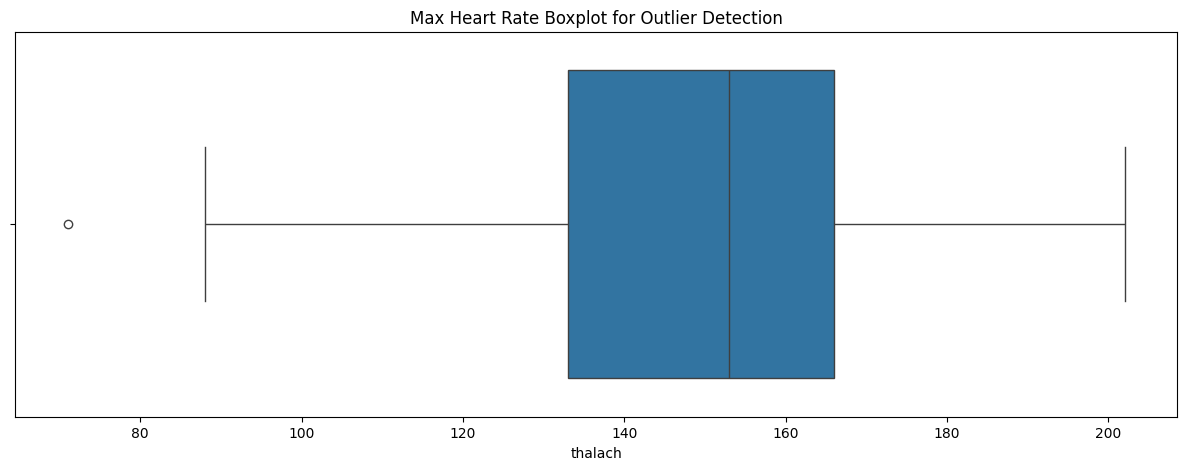

In [27]:
# Detect and handle outliers using boxplots

plt.figure(figsize=(15, 5))
sns.boxplot(x=df['chol'])
plt.title('Cholesterol Boxplot for Outlier Detection')
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x=df['trestbps'])
plt.title('Resting Blood Pressure Boxplot for Outlier Detection')
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x=df['thalach'])
plt.title('Max Heart Rate Boxplot for Outlier Detection')
plt.show()

In [29]:

# ***Modeling and Evaluation**

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay

# Train and evaluate different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate performance
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.2f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'ROC Curve for {model_name}')
    plt.show()

Logistic Regression Performance:
Accuracy: 0.60
Precision: 0.55
Recall: 0.60
F1 Score: 0.57


ValueError: multi_class must be in ('ovo', 'ovr')

Logistic Regression Performance:
Accuracy: 0.60
Precision: 0.55
Recall: 0.60
F1 Score: 0.57
ROC-AUC: 0.74


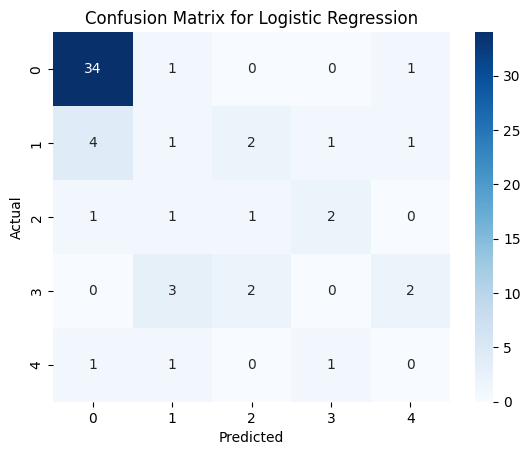

ValueError: Expected 'estimator' to be a binary classifier. Got 5 classes instead.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay

# Train and evaluate different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate performance
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    if len(set(y_test)) > 2:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    else:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"ROC-AUC: {roc_auc:.2f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'ROC Curve for {model_name}')
    plt.show()

Logistic Regression Performance:
Accuracy: 0.60
Precision: 0.55
Recall: 0.60
F1 Score: 0.57
ROC-AUC: 0.74


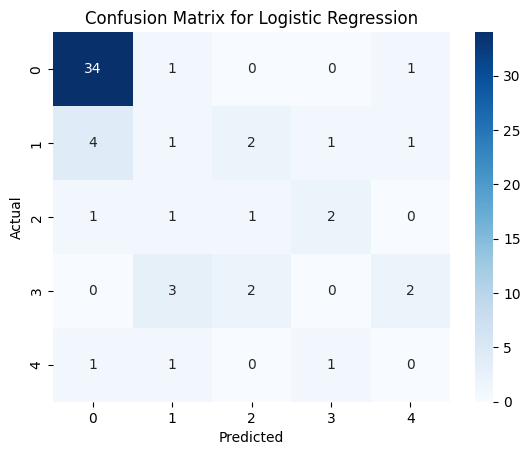

Decision Tree Performance:
Accuracy: 0.53
Precision: 0.63
Recall: 0.53
F1 Score: 0.57
ROC-AUC: 0.61


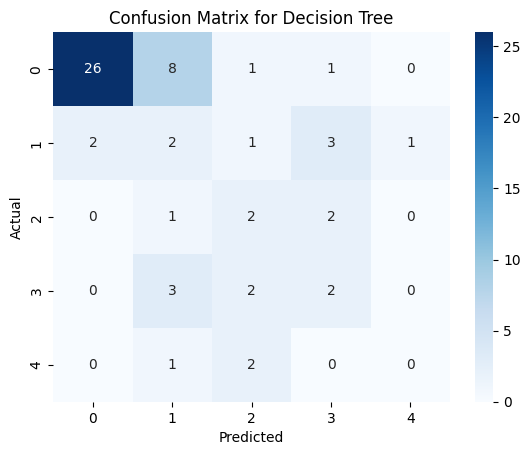

Random Forest Performance:
Accuracy: 0.60
Precision: 0.48
Recall: 0.60
F1 Score: 0.53
ROC-AUC: 0.73


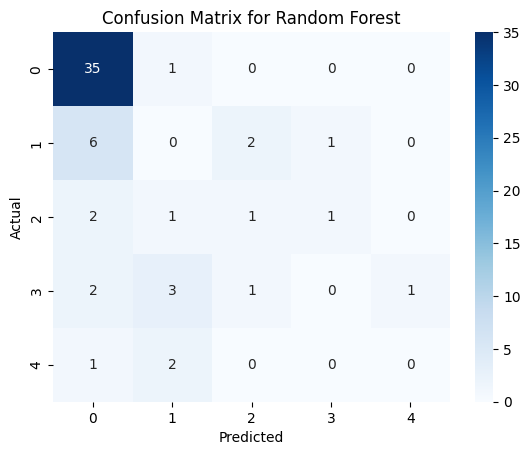

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay

# Train and evaluate different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate performance
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    if len(set(y_test)) > 2:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    else:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"ROC-AUC: {roc_auc:.2f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC curve
    if len(set(y_test)) == 2:
        RocCurveDisplay.from_estimator(model, X_test, y_test)
        plt.title(f'ROC Curve for {model_name}')
        plt.show()

Logistic Regression Performance:
Accuracy: 0.60
Precision: 0.55
Recall: 0.60
F1 Score: 0.57
ROC-AUC: 0.74


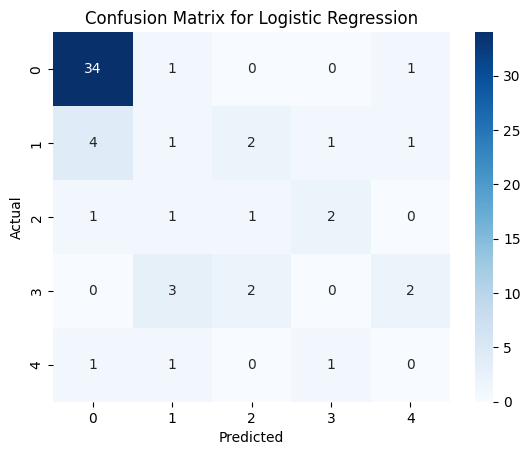

Decision Tree Performance:
Accuracy: 0.57
Precision: 0.64
Recall: 0.57
F1 Score: 0.60
ROC-AUC: 0.63


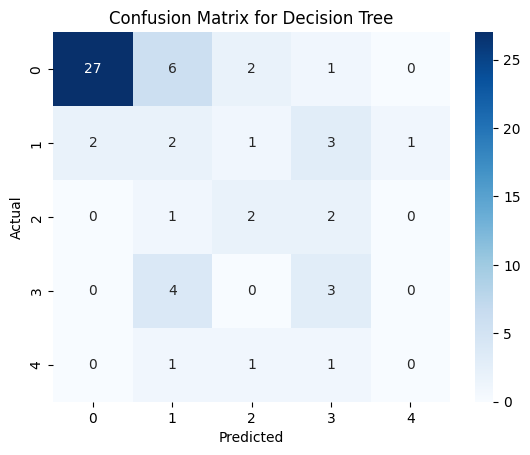

Random Forest Performance:
Accuracy: 0.60
Precision: 0.47
Recall: 0.60
F1 Score: 0.53
ROC-AUC: 0.75


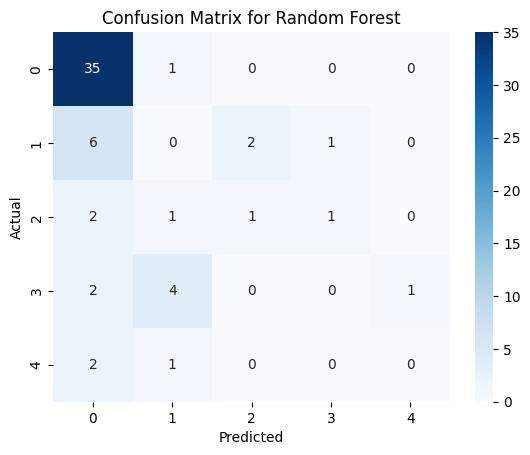

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay

# Train and evaluate different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate performance
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    if len(set(y_test)) > 2:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    else:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"ROC-AUC: {roc_auc:.2f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC curve
    if len(set(y_test)) == 2:
        RocCurveDisplay.from_estimator(model, X_test, y_test)
        plt.title(f'ROC Curve for {model_name}')
        plt.show()

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

In [37]:
for model_name, model in models.items():
y_pred = model.predict(X_test)
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title(f'Confusion Matrix for {model_name}')
plt.show()

IndentationError: expected an indented block after 'for' statement on line 1 (1166922768.py, line 2)

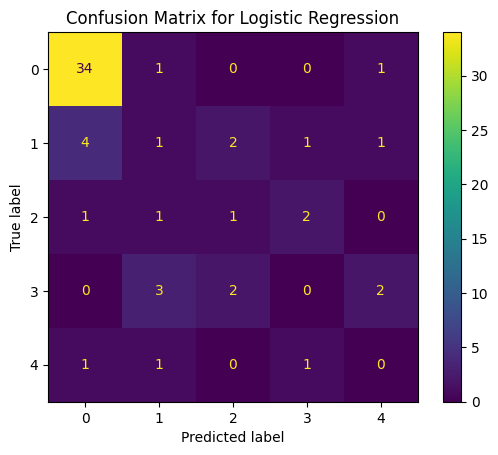

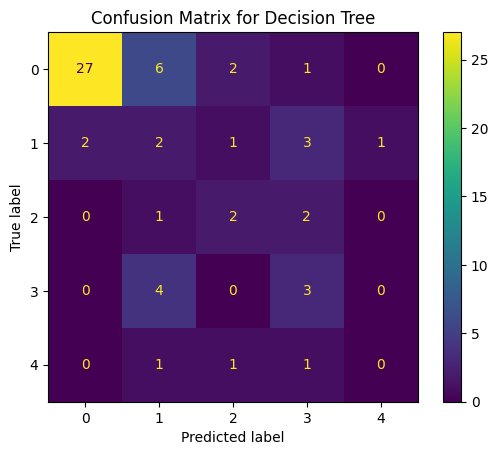

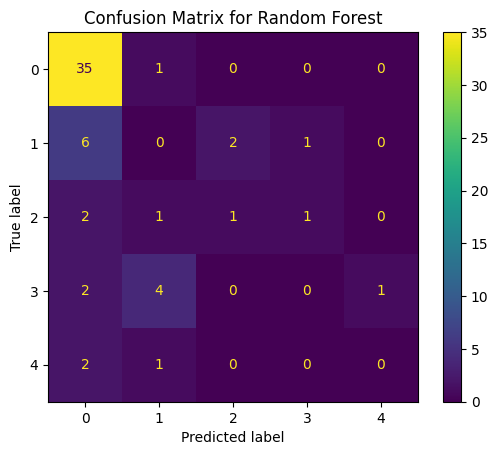

In [40]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot ROC curve for binary classification

for model_name, model in models.items():
    if len(set(y_test)) == 2:
        RocCurveDisplay.from_estimator(model, X_test, y_test)
        plt.title(f'ROC Curve for {model_name}')
        plt.show()